Задача заключается в интерпретации нахождения k-соседей к целевому вектору. Метрика - Евклидова норма.

Для начала импортируем необходимые библиотеки pandas, numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Сгенерируем объекты путём записи информации в CSV-файл: каждый из них имеет 3 признака (x_0, x_1, x_2)

In [2]:
with open('test3.csv', 'w') as f:
    f.write('x_0,x_1,x_2\n')
    for _ in range(1000):
        f.write(str(np.random.uniform(-3, 100)) + ","
                + str(np.random.uniform(-3, 100)) + ","
                + str(np.random.uniform(-3, 100))+'\n')

Считали из файла 1000 сгенерированных объектов с 3 признаками в каждом

In [3]:
data = pd.read_csv('test3.csv')

Определим класс KNN. В методе <b>fit</b> происходит запись тестового набора данных для поиска в соответствующий аттрибут класса <i>train_data</i>. В методе <b>predict</b> происходит нормировка даннных и целевого вектора (в зависимости от условия метод <b>norm_data</b>), рассчитывается <b>метрика близости элемента к целевому</b>, а также происходит возвращение списка индексов ближайших <b>k-соседей</b> вектора (от ближайшего по увеличению метрики).

In [4]:
class KNN:
    def __init__(self, norm=True):
        self.norm = norm
        self.train_data = None
    
    def fit(self, data):
        self.train_data = pd.DataFrame(data, columns=[f'x_{el}' for el in range(data.shape[1])])
    
    def predict(self, tar, k=5):
        
        # normalize
        if self.norm:
            tar = self.norm_data(tar)
        
        # calucalting dist between target and others objects
        target_met = np.square(tar - self.train_data.to_numpy()).sum(axis=1)
        
        # extract first K object with min d to our target
        return pd.concat([self.train_data, pd.DataFrame({'target_met': target_met})], axis=1).sort_values(by='target_met').head(k)
    
    def norm_data(self, x):
        
        # getting extremes (vectors) from each column and convert
        x_min, x_max = self.train_data.min().to_numpy(), self.train_data.max().to_numpy()
        
        # calculating new data by normalization
        normal_data = self.calc_func(self.train_data.to_numpy(), x_max, x_min)
        
        # return data to train set
        self.train_data.update(pd.DataFrame(data=normal_data, columns=self.train_data.columns))
        
        # normalize target vector
        return self.calc_func(x, x_max, x_min)
    
    # function normalize
    def calc_func(self, data, y_max, y_min):
        return (data - y_min) / (y_max - y_min)

Создадим экземляр класса <b>KNN</b> с условием нормировки, загрузим тестовые данные, сгенерированные ранее.

In [5]:
test = KNN(True)

In [6]:
test.fit(data.to_numpy().copy())

Пусть целевой вектор будет V = (0, 80, 79), а искать будем 7 ближайших соседей к данному вектору.

In [7]:
k, tg = 7, [0, 80, 79]
res = test.predict(tg, k)

Посмотрим на первые k соседей целевого вектора в исходном датасете и метрику близости

In [8]:
df_res = pd.concat([data.iloc[list(res.index)], res['target_met']], axis=1)

In [9]:
df_res

,x_0,x_1,x_2,target_met
784,-1.149938,83.996251,78.920831,0.001637
543,3.171034,76.660867,79.753126,0.002060
870,6.349108,79.626903,77.304374,0.004099
892,-0.720761,84.097345,86.095197,0.006408
570,-1.161978,87.155389,85.621089,0.009127
214,6.204371,86.492392,74.631517,0.009439
274,5.465428,81.358953,70.216816,0.010311


Построим график Евклидовой нормы (целевой метрики) для первых k-соседей  

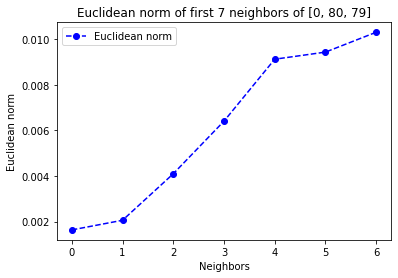

In [10]:
plt.plot(df_res['target_met'].to_numpy(), 'o--b', label='Euclidean norm')
plt.title(f"Euclidean norm of first {k} neighbors of [{', '.join(map(str, tg))}]")
plt.xlabel('Neighbors')
plt.ylabel('Euclidean norm')
plt.legend()
plt.show()